In [ ]:
!pip3 install ipympl

     |████████████████████████████████| 507 kB 2.7 MB/s 


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()



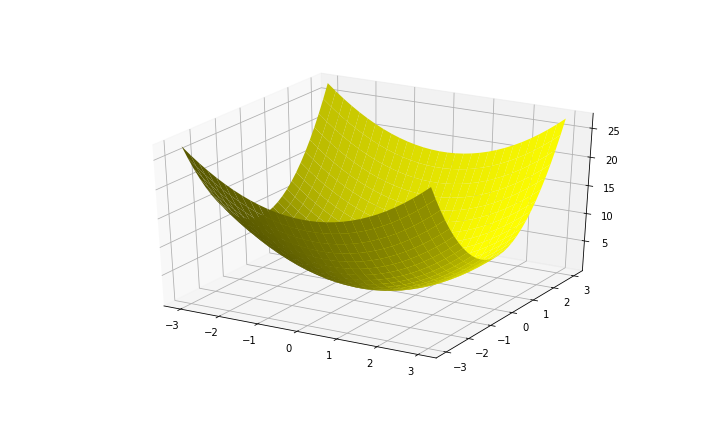

Unhandled message type set_device_pixel_ratio. {'type': 'set_device_pixel_ratio', 'device_pixel_ratio': 1.100000023841858}


In [ ]:
# Import libraries

from mpl_toolkits import mplot3d
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
%matplotlib widget

# Define Function

def function_z(x,y):
    return x**2 + 2*y**2

# Define Data

x_val = np.linspace(-3, 3, 30)
y_val = np.linspace(-3, 3, 30)

X, Y = np.meshgrid(x_val, y_val)

# Call function

z = function_z(X, Y)

# Create figure

fig = plt.figure(figsize =(10,6))
ax = plt.axes(projection='3d')

# Create surface plot

ax.plot_surface(X, Y, z, color='yellow');

# Display

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


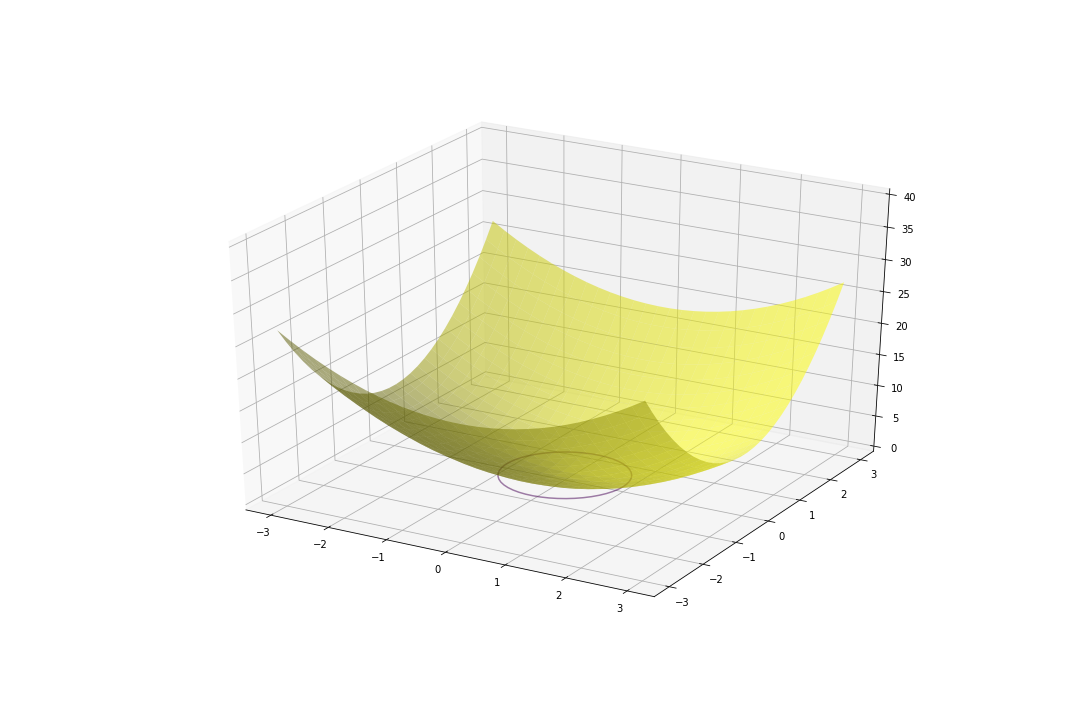

Unhandled message type set_device_pixel_ratio. {'type': 'set_device_pixel_ratio', 'device_pixel_ratio': 1.100000023841858}


In [ ]:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,1,20)
# ax.plot_surface(Xc, Yc, Zc, alpha=0.5)


# ==========
x_val = np.linspace(-3, 3, 30)
y_val = np.linspace(-3, 3, 30)

X, Y = np.meshgrid(x_val, y_val)

# Call function

z = function_z(X, Y)


ax.plot_surface(X, Y, z, color='yellow', alpha=0.5)
# ax.contour(Xc, Yc, Zc, levels = [0], alpha=0.5)
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
# # Display
# ==========



plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


(-2.0, 0.9893435547884548)

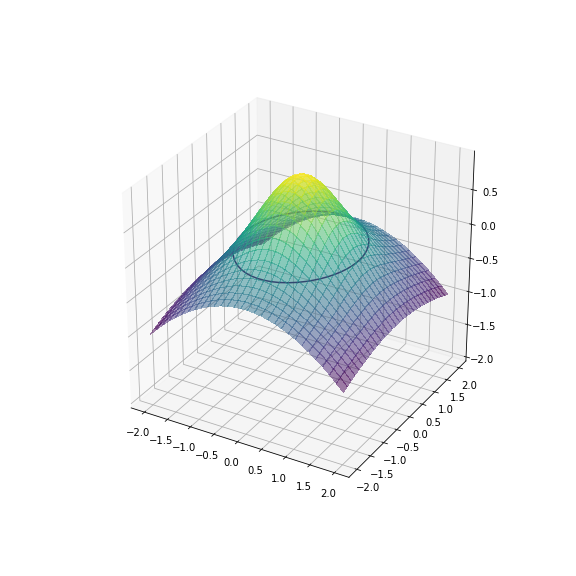

Unhandled message type set_device_pixel_ratio. {'type': 'set_device_pixel_ratio', 'device_pixel_ratio': 1.100000023841858}


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np    

def f(x, y):
    return np.exp(-(x**2 + y**2))

def g(x, y):
    return (3*x**2 + y**2)/16


fig = plt.figure(figsize = (8,8))
ax = fig.gca(projection='3d')
X = np.linspace(-2, 2, 30)
Y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(X, Y)

Z = g(X,Y)

ax.plot_surface(X, Y, f(X,Y)-g(X,Y), rstride=1, cstride=1, cmap = cm.viridis, antialiased=False, alpha = 0.5)
# ax.contour(X, Y, f(X,Y) - g(X,Y), zdir='z', offset=-2, levels = [0])
ax.contour(X, Y, f(X,Y) - g(X,Y), levels = [0])
ax.set_zlim(zmin = -2)


In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def compose1(f, c):
    # compose a function of two variable with the constant function phi(x)=c:  f(phi(x), y) 
    g = lambda y: f(c, y)
    return g

def compose2 (f, c):
     # compose a function of two variable with the constant function phi(x)=c: f(x, phi(x))
    g = lambda x: f(x, c)
    return g

def composefh(f, h):
    # compose the function f(x,y) with y=h(x):
    g = lambda x: f(x, h(x))
    return g

def get_curve(M, v, f):
    # M a 3-list or array- represents a point in the plane of intersection: M=[x0, y0, 0]
    # v= [a, b, 0] direction contained in the plane along with w=[0,0,1]
    # f function of two variables that define the equation of the surfae z=f(x,y)
    # returns the function g that defines the equation y=g(x) of the curve of intersection
    
    x0, y0, _ =M
    a, b, _ = v 
    if a == 0 and b != 0:
        g = compose1(f, x0)
        id =1
    elif a != 0 and b==0:
        g =compose2(f, y0)
        id=2
    else:
        h = lambda x: y0+b*(x-x0)/a
        g = composefh(f, h)
        id=3
    return g, id    

# Function that returns the X, Y, Z-array defining the section plane as a Plotly surface
def get_plane(M, v,   id, xx, yy, zz):
    
    # M point contained by the plane
    # v direction included in plane (orthogonal to w=[0, 0, 1])
    # id - is the id returned by the function get_curve; the plane arrays, X, Y, Z,  are defined according to id value
    x0, y0, _= M
    a, b, _= v
  
    if id == 1:
        Y, Z = np.meshgrid(yy, zz)
        X = x0*np.ones(Y.shape)
    elif id == 2 :
        X, Z = np.meshgrid(xx, zz)
        Y = y0*np.ones(X.shape)
    elif id == 3 :
        X, Z = np.meshgrid(xx, zz)
        Y = y0+b*(X-x0)/a   
    else:
        pass
    return X, Y, Z
        

# Define the surface to be cut by a plane:
f_surf = lambda x, y:  (x+y)/(2+np.cos(x)*np.sin(y))

# and data to instantiate the Plotly Surface:
xx = np.linspace(-2, 5, 200)
yy = np.linspace(0, 10, 300)
x,y = np.meshgrid(xx, yy)
z = f_surf(x, y)
zz = np.linspace(z.min(), z.max(), 100)

# define the elements to get the section plane equation
M = [1, 2, 0]  # a point in the plane
v = [1, 2, 0] # a direction contained in the plane
g, id = get_curve(M, v, f_surf)
X, Y, Z =  get_plane(M, v,   id, xx, yy, zz)

#Define subplots of 1 row and two columns. In the subplot (1,1) draw the surface of equation z=f(x,y) and the cutting plane
#perpendicular on the plane z=0, while in (1,2) the resulted curve.

fig = make_subplots(
     rows=1, cols=2,
     horizontal_spacing=0.1,
     specs=[[{"type": "scene"}, {"type": "xy"}]])
fig.add_trace(go.Surface(x=x,
                          y=y, 
                          z=z,
                          colorscale="Viridis",
                          showscale=False), row=1, col=1)
fig.add_trace(go.Surface(x=X, y=Y, z=Z, 
                         colorscale= [[0, "rgb(254, 254, 254)"],
                                      [1, "rgb(254, 254, 254)"]],
                         showscale=False,
                         opacity =0.65), row=1, col=1)
fig.add_trace(go.Scatter(x= xx, y = g(xx), mode="lines"), row=1, col=2)    
fig.update_layout(title_text="Slicing a surface by a plane",
                  title_x=0.5,
                  scene= {"camera": {"eye": {"x": 1.65, "z":0.75}}},
                  width=900, height=500, yaxis = {"domain":  [0, 0.85]}
              )

Output hidden; open in https://colab.research.google.com to view.

In [4]:
import plotly.graph_objects as go
import numpy as np

z1 = np.array([
    [8.83,8.89,8.81,8.87,8.9,8.87],
    [8.89,8.94,8.85,8.94,8.96,8.92],
    [8.84,8.9,8.82,8.92,8.93,8.91],
    [8.79,8.85,8.79,8.9,8.94,8.92],
    [8.79,8.88,8.81,8.9,8.95,8.92],
    [8.8,8.82,8.78,8.91,8.94,8.92],
    [8.75,8.78,8.77,8.91,8.95,8.92],
    [8.8,8.8,8.77,8.91,8.95,8.94],
    [8.74,8.81,8.76,8.93,8.98,8.99],
    [8.89,8.99,8.92,9.1,9.13,9.11],
    [8.97,8.97,8.91,9.09,9.11,9.11],
    [9.04,9.08,9.05,9.25,9.28,9.27],
    [9,9.01,9,9.2,9.23,9.2],
    [8.99,8.99,8.98,9.18,9.2,9.19],
    [8.93,8.97,8.97,9.18,9.2,9.18]
])

z2 = z1 + 1
z3 = z1 - 1

fig = go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9),
    go.Surface(z=z3, showscale=False, opacity=0.9)

])

fig.show()


In [1]:
!pip install vedo


In [ ]:
from vedo import *
sph = Sphere().pos(0,1,0).c('blue').alpha(0.2)
cyl = Cylinder(r=0.5, height=3).triangulate().rotateY(90).alpha(0.2)
sic = sph.intersectWith(cyl).c('red').lw(5)
show(sph, cyl, sic, axes=7)